#### Model Training
**1.1 Import Data and Required Packages**

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

**Import the CSV Data as Pandas DataFrame**

In [4]:
df = pd.read_csv('data/StudentsPerformance.csv')

**Show Top 5 Records**

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variables

In [7]:
X = df.drop(columns=['math score'], axis=1)

In [8]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [12]:
categoricals = [column for column in df.columns if df[column].dtype == 'O' ]
categoricals

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [13]:
for column in categoricals:
    print(f"Categories in {column}: {df[column].unique()}")

Categories in gender: ['female' 'male']
Categories in race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch: ['standard' 'free/reduced']
Categories in test preparation course: ['none' 'completed']


In [14]:
y = df['math score']

In [15]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [16]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncorder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features),
    ]
)

In [17]:
X = preprocessor.fit_transform(X)

In [18]:
X.shape

(1000, 19)

In [19]:
# Separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

**Create ans Evaluate function to give all metrics after model training**

In [21]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_absolute_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [33]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbours Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGRegressor': XGBRegressor(),
    'CatBoosting Regressor': CatBoostRegressor(verbose=False),
    'AdaBoost Regressor': AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for training set')
    print(f'Room Mean Squared Error: {model_train_rmse: .4f}')
    print(f'Mean Absolute Error: {model_test_mae: .4f}')
    print(f'R2 Score: {model_test_r2: .4f}')
    model_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for training set
Room Mean Squared Error:  2.0657
Mean Absolute Error:  4.2158
R2 Score:  0.8803


Lasso
Model performance for training set
Room Mean Squared Error:  2.2817
Mean Absolute Error:  5.1579
R2 Score:  0.8253


Ridge
Model performance for training set
Room Mean Squared Error:  2.0652
Mean Absolute Error:  4.2111
R2 Score:  0.8806


K-Neighbours Regressor
Model performance for training set
Room Mean Squared Error:  2.1253
Mean Absolute Error:  5.6210
R2 Score:  0.7838


Decision Tree
Model performance for training set
Room Mean Squared Error:  0.1369
Mean Absolute Error:  6.2900
R2 Score:  0.7464


Random Forest Regressor
Model performance for training set
Room Mean Squared Error:  1.3541
Mean Absolute Error:  4.5873
R2 Score:  0.8525


XGRegressor
Model performance for training set
Room Mean Squared Error:  0.8291
Mean Absolute Error:  5.0577
R2 Score:  0.8278


CatBoosting Regressor
Model performance for training set
Room Mean Squared Err

**Results**

In [35]:
pd.DataFrame(
    list(zip(model_list, r2_list)),
    columns=['Model Name', 'R2 Score']
).sort_values(
    by=['R2 Score'],
    ascending=False
)

,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880345
5,Random Forest Regressor,0.852463
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.844580
6,XGRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbours Regressor,0.783813
4,Decision Tree,0.746444


#### Linear Regression

In [36]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f'Accuracy of the model is {score: .2f}')

Accuracy of the model is  88.03


**Plot y_pred and y_test**

Text(0, 0.5, 'Predicated')

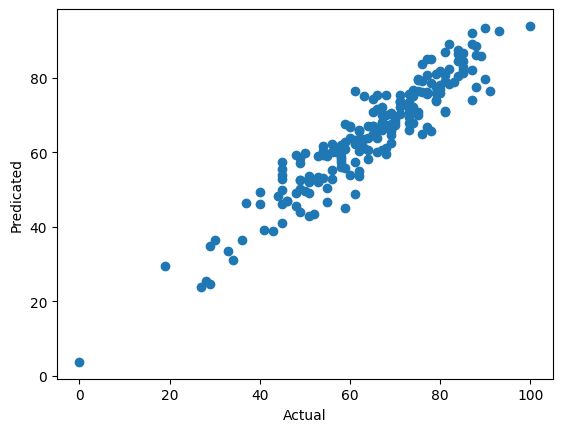

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicated')

<Axes: xlabel='math score'>

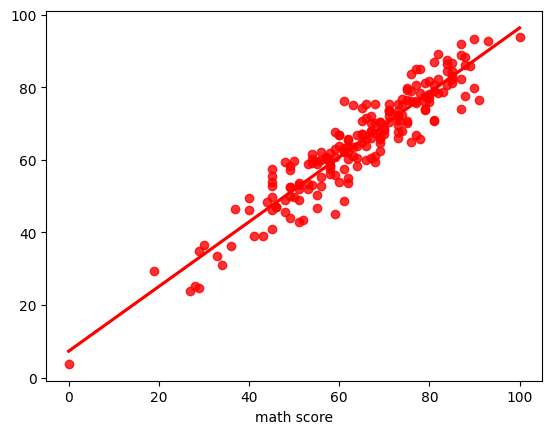

In [38]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

**Difference between Actual and Predicted Values**

In [39]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812


In [40]:
## The End